In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nlu experiment - freeze experiment.csv')

df['time_taken_5s'] = df['time_taken_5s'].str.replace(',', '')
df['time_taken_10s'] = df['time_taken_10s'].str.replace(',', '')
df['accuracy_10s'] = df['accuracy_10s'].str.replace(',', '')

df[['time_taken_5s', 'time_taken_10s', 'accuracy_10s']] = df[['time_taken_5s', 'time_taken_10s', 'accuracy_10s']].astype('float')

# df.to_csv('nlu experiment - freeze experiment (reformatted).csv', index=False)

In [3]:
# create a new column indicating name and frozen ratio
df['name_ratio'] = df['name'] + ' (' + (df['ratio_layer_freezed']*100).apply(lambda x:format(x, '.1f')) + '%)'

In [5]:
df

,n_layer_freezed,name,ratio_layer_freezed,time_taken_5s,accuracy_5s,time_taken_10s,accuracy_10s,name_ratio
0,None,No freezing,0.000,413.529230,0.775,879.783277,0.862338,No freezing (0.0%)
1,4,Before 1st layer,0.313,375.950593,0.777,859.533139,0.859091,Before 1st layer (31.3%)
2,20,1st layer,0.370,363.637902,0.759,827.481255,0.849351,1st layer (37.0%)
3,36,2nd layer,0.426,351.294419,0.788,795.089642,0.871429,2nd layer (42.6%)
4,52,3rd layer,0.483,338.561563,0.781,758.216262,0.866883,3rd layer (48.3%)
5,68,4th layer,0.540,325.724956,0.777,725.623116,0.869481,4th layer (54.0%)
6,84,5th layer,0.597,313.889165,0.779,693.747673,0.866883,5th layer (59.7%)
7,100,6th layer,0.654,301.690320,0.792,659.571908,0.872727,6th layer (65.4%)
8,116,7th layer,0.711,289.224460,0.784,626.595767,0.868182,7th layer (71.1%)
9,132,8th layer,0.767,277.425091,0.792,587.974364,0.867532,8th layer (76.7%)


In [8]:
df_cleaned = df.iloc[:-1, :]
df_cleaned

,n_layer_freezed,name,ratio_layer_freezed,time_taken_5s,accuracy_5s,time_taken_10s,accuracy_10s,name_ratio
0,None,No freezing,0.000,413.529230,0.775,879.783277,0.862338,No freezing (0.0%)
1,4,Before 1st layer,0.313,375.950593,0.777,859.533139,0.859091,Before 1st layer (31.3%)
2,20,1st layer,0.370,363.637902,0.759,827.481255,0.849351,1st layer (37.0%)
3,36,2nd layer,0.426,351.294419,0.788,795.089642,0.871429,2nd layer (42.6%)
4,52,3rd layer,0.483,338.561563,0.781,758.216262,0.866883,3rd layer (48.3%)
5,68,4th layer,0.540,325.724956,0.777,725.623116,0.869481,4th layer (54.0%)
6,84,5th layer,0.597,313.889165,0.779,693.747673,0.866883,5th layer (59.7%)
7,100,6th layer,0.654,301.690320,0.792,659.571908,0.872727,6th layer (65.4%)
8,116,7th layer,0.711,289.224460,0.784,626.595767,0.868182,7th layer (71.1%)
9,132,8th layer,0.767,277.425091,0.792,587.974364,0.867532,8th layer (76.7%)


In [74]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Layer freezed vs Accuracy (5-shot)')

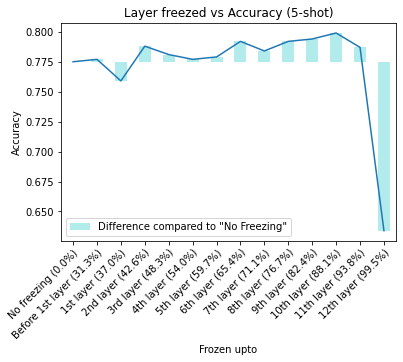

In [75]:
(df_cleaned['accuracy_5s'] - df_cleaned['accuracy_5s'][0]).plot.bar(bottom=df_cleaned['accuracy_5s'][0],
                                                                    use_index=False, color='c', alpha=0.3, label='Difference compared to "No Freezing"')
sns.lineplot(df_cleaned['name_ratio'], df_cleaned['accuracy_5s'])

plt.xticks(list(range(len(df_cleaned['name_ratio']))), 
           list(df_cleaned['name_ratio']),
           rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Frozen upto')
plt.ylabel('Accuracy')
plt.title('Layer freezed vs Accuracy (5-shot)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Layer freezed vs Accuracy (10-shot)')

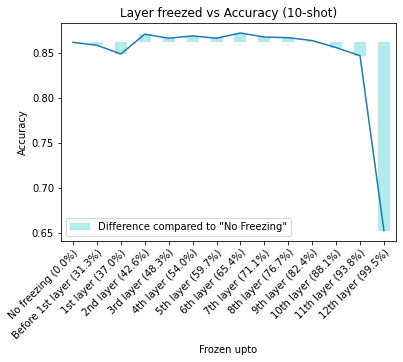

In [76]:
(df_cleaned['accuracy_10s'] - df_cleaned['accuracy_10s'][0]).plot.bar(bottom=df_cleaned['accuracy_10s'][0],
                                                                    use_index=False, color='c', alpha=0.3, label='Difference compared to "No Freezing"')
sns.lineplot(df_cleaned['name_ratio'], df_cleaned['accuracy_10s'])

plt.xticks(list(range(len(df_cleaned['name_ratio']))), 
           list(df_cleaned['name_ratio']),
           rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Frozen upto')
plt.ylabel('Accuracy')
plt.title('Layer freezed vs Accuracy (10-shot)')